# We got a dataframe with high correlations, lets analyze it

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In this variant we take correlations for everything, not just TRA, TRB

In [2]:
cancers = pd.read_csv("cancer_types.csv")
corrs = pd.read_csv("all_high_corrs_deconvs_genes-ABS.csv")
corrs = corrs.iloc[:, 1:]
corrs

,TCGA_id,Gene,Cell,Correlation
0,OV,TRAV27,T cell CD8+,0.503891
1,UCEC,TRAV21,Macrophage M1,0.519973
2,UCEC,TRAV12-2,T cell CD8+,0.500199
3,BLCA,TRBV6-5,T cell CD8+,0.548417
4,BLCA,IGHV3-49,Macrophage M2,0.508890
...,...,...,...,...
1244,UVM,TRAJ48,T cell CD8+,0.502243
1245,UVM,TRAV13-2,T cell follicular helper,0.502002
1246,UVM,TRAJ4,Macrophage M1,0.501159
1247,UVM,TRAV12-1,Macrophage M1,0.500568


In [3]:
corrs = corrs[abs(corrs["Correlation"]) <= 0.9]

### EDA

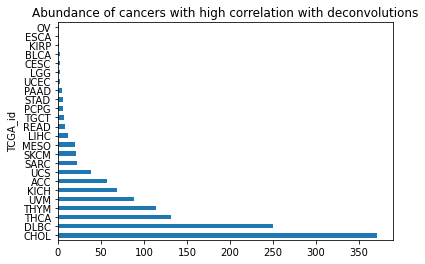

In [4]:
corrs.TCGA_id.value_counts().plot.barh()
plt.title("Abundance of cancers with high correlation with deconvolutions")
plt.show()

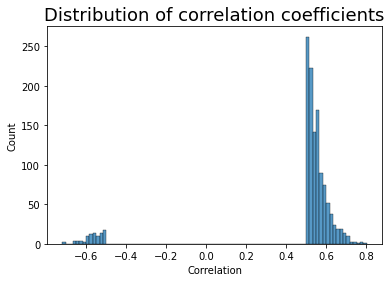

In [5]:
sns.histplot(corrs["Correlation"], bins=90, kde=False)
plt.title("Distribution of correlation coefficients", fontsize=18)
plt.show()

In [6]:
print("Unique cancers:", corrs.TCGA_id.nunique())
corrs.TCGA_id.value_counts()

Unique cancers: 24


TCGA_id
CHOL    371
DLBC    250
THCA    132
THYM    114
UVM      88
KICH     69
ACC      57
UCS      38
SARC     22
SKCM     21
MESO     20
LIHC     12
READ      8
TGCT      7
PCPG      6
STAD      6
PAAD      5
UCEC      2
LGG       2
CESC      2
BLCA      2
KIRP      1
ESCA      1
OV        1
Name: count, dtype: int64

In [7]:
corrs.Gene.value_counts()

Gene
TRBJ2-2     17
TRBV27      15
TRBV12-4    13
TRBV9       12
TRGV10      12
            ..
IGHV7-81     1
IGLV3-27     1
IGHV3-53     1
IGKV1-35     1
TRAV8-1      1
Name: count, Length: 290, dtype: int64

Names

In [8]:
cancers[cancers["Cancer Type"].isin(corrs.TCGA_id.unique())]

,Cancer Type,TCGA Study Name
0,ACC,Adrenocortical carcinoma
1,BLCA,Bladder Urothelial Carcinoma
3,CESC,Cervical squamous cell carcinoma and endocervi...
4,CHOL,Cholangiocarcinoma
6,DLBC,Lymphoid Neoplasm Diffuse Large B-cell Lymphoma
7,ESCA,Esophageal carcinoma
10,KICH,Kidney Chromophobe
12,KIRP,Kidney renal papillary cell carcinoma
13,LGG,Brain Lower Grade Glioma
14,LIHC,Liver hepatocellular carcinoma


### Inspect CHOL

In [9]:
deconv = pd.read_csv("CIBERSORT-ABS_dec.csv")
dec_numeric = deconv.set_index("cell_type").select_dtypes(include=["number"])
dec_numeric = dec_numeric.loc[~dec_numeric.index.duplicated(keep="first")]
dec_numeric.head()

,B cell naive,B cell memory,B cell plasma,T cell CD8+,T cell CD4+ naive,T cell CD4+ memory resting,T cell CD4+ memory activated,T cell follicular helper,T cell regulatory (Tregs),T cell gamma delta,...,Monocyte,Macrophage M0,Macrophage M1,Macrophage M2,Myeloid dendritic cell resting,Myeloid dendritic cell activated,Mast cell activated,Mast cell resting,Eosinophil,Neutrophil
cell_type,,,,,,,,,,,,,,,,,,,,,
TCGA-OR-A5J1,0.000552,0.000429,0.000000,0.021223,0.000000,0.039226,0.0,0.003787,0.009358,0.0,...,0.018473,0.000000,0.000000,0.071280,0.000000,0.002659,0.011477,0.000000,0.00032,0.0
TCGA-OR-A5J2,0.013554,0.000000,0.044274,0.021486,0.000000,0.024412,0.0,0.016756,0.000000,0.0,...,0.006484,0.012895,0.005895,0.120971,0.000000,0.009007,0.000000,0.002818,0.00000,0.0
TCGA-OR-A5J3,0.007283,0.000000,0.022736,0.001968,0.007245,0.016556,0.0,0.000000,0.000000,0.0,...,0.004296,0.000000,0.000000,0.026180,0.000000,0.018127,0.005667,0.000000,0.00000,0.0
TCGA-OR-A5J5,0.025700,0.000000,0.004016,0.003783,0.000000,0.014841,0.0,0.001131,0.000079,0.0,...,0.007960,0.021402,0.000769,0.010491,0.000000,0.000000,0.004009,0.000000,0.00000,0.0
TCGA-OR-A5J6,0.001551,0.000000,0.001715,0.010652,0.000000,0.024460,0.0,0.000745,0.000355,0.0,...,0.025290,0.000000,0.000000,0.173291,0.001673,0.000930,0.018014,0.000000,0.00000,0.0


In [10]:
CHOL = corrs[corrs["TCGA_id"] == "CHOL"]
print(CHOL.shape)
CHOL

(371, 4)


,TCGA_id,Gene,Cell,Correlation
226,CHOL,IGHV3-9,T cell follicular helper,0.801977
227,CHOL,IGHV3-30,T cell follicular helper,0.776188
228,CHOL,IGLV9-49,T cell follicular helper,0.759174
229,CHOL,IGHV3-7,T cell follicular helper,0.749066
230,CHOL,IGHV3-73,T cell follicular helper,0.743178
...,...,...,...,...
592,CHOL,TRAJ27,T cell follicular helper,0.501373
593,CHOL,TRAJ42,Macrophage M1,0.501170
594,CHOL,TRBJ1-3,T cell CD8+,0.500987
595,CHOL,IGHV3-53,T cell CD4+ memory resting,0.500879


The most common gene (probably doesn't tell our anything)

In [11]:
CHOL[CHOL.Gene.str.contains("TRBV15")]

,TCGA_id,Gene,Cell,Correlation
390,CHOL,TRBV15,T cell CD4+ naive,0.559984


In [12]:
CHOL.Cell.value_counts().reset_index()

,Cell,count
0,T cell follicular helper,83
1,T cell CD8+,69
2,T cell regulatory (Tregs),63
3,T cell CD4+ memory resting,41
4,Macrophage M1,36
5,Macrophage M2,16
6,T cell CD4+ naive,16
7,Monocyte,15
8,NK cell activated,11
9,B cell memory,9


In [13]:
corrs.Gene.value_counts().reset_index()

,Gene,count
0,TRBJ2-2,17
1,TRBV27,15
2,TRBV12-4,13
3,TRBV9,12
4,TRGV10,12
...,...,...
285,IGHV7-81,1
286,IGLV3-27,1
287,IGHV3-53,1
288,IGKV1-35,1


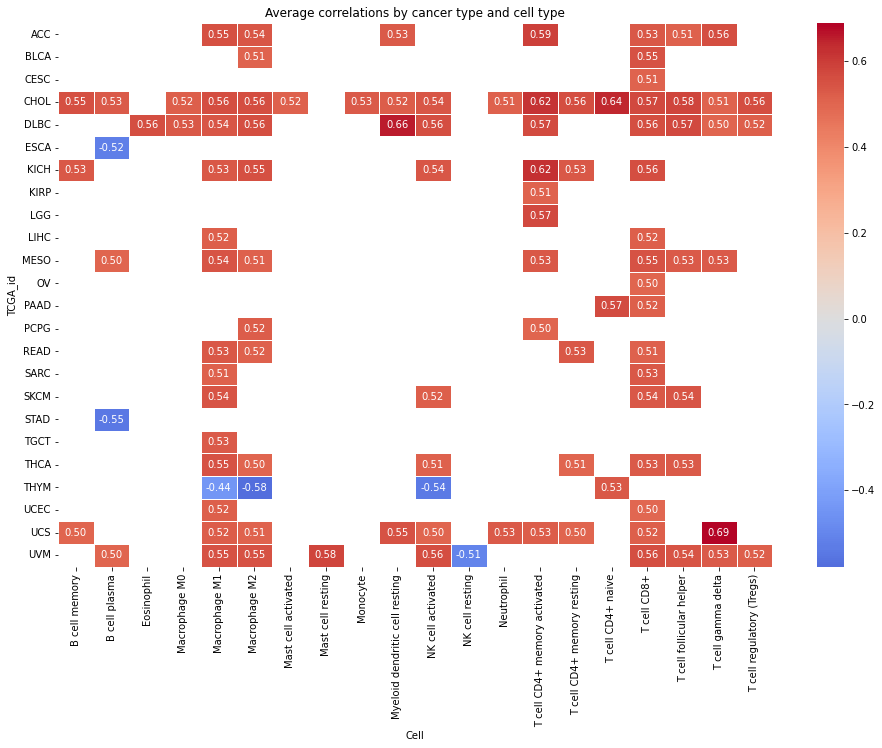

In [14]:
heatmap_data = corrs.pivot_table(
    index="TCGA_id", columns="Cell", values="Correlation", aggfunc="mean"
)

plt.figure(figsize=(16, 10))
sns.heatmap(
    heatmap_data, cmap="coolwarm", center=0, annot=True, fmt=".2f", linewidths=0.5
)
plt.title("Average correlations by cancer type and cell type")
plt.show()

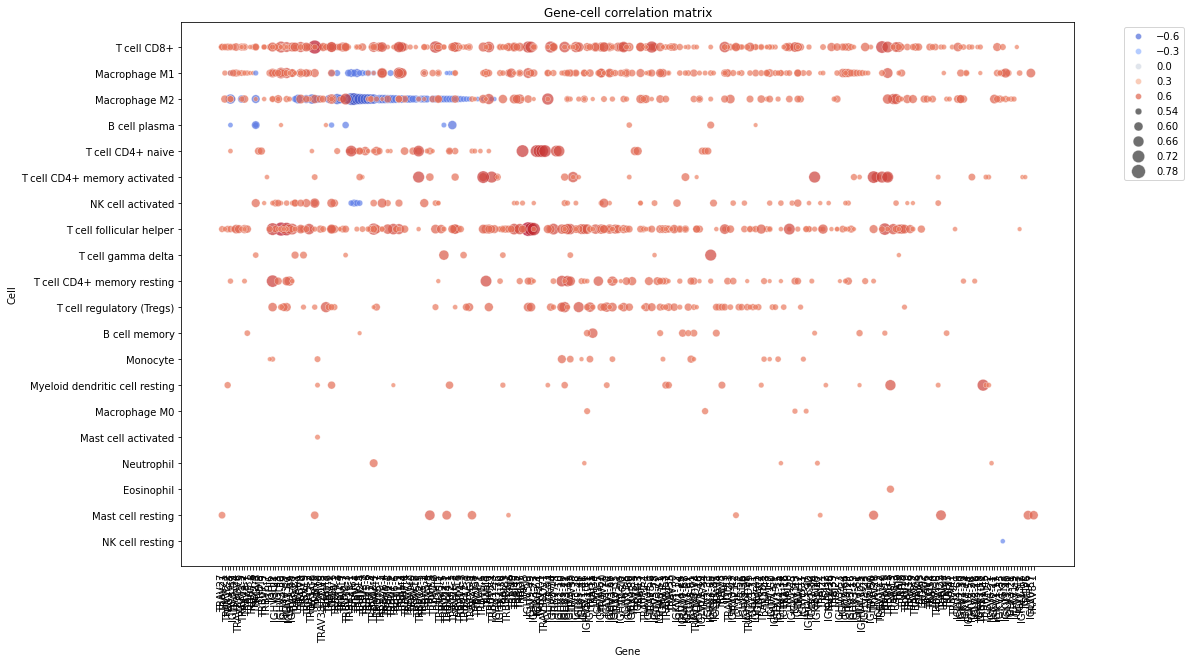

In [15]:
plt.figure(figsize=(16, 10))
sns.scatterplot(
    data=corrs,
    x="Gene",
    y="Cell",
    hue="Correlation",
    size=np.abs(corrs["Correlation"]),
    sizes=(20, 200),
    palette="coolwarm",
    alpha=0.7,
)
plt.xticks(rotation=90)
plt.title("Gene-cell correlation matrix")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

## Cancers subtypes

Let's add information about cancers subtypes to the table and see if we can find any patterns.

In [16]:
tcga_type = pd.read_csv("tcga_type_dbgap.txt", delimiter="\t")
tcga_type["project_id"] = tcga_type["project_id"].apply(
    lambda x: x.split("-")[1]
)  # rm tcga-

In [17]:
corrs = pd.merge(corrs, tcga_type, left_on="TCGA_id", right_on="project_id", how="left")
corrs

,TCGA_id,Gene,Cell,Correlation,project_id,cancer_type,cancer_origin,cancer_subtype
0,OV,TRAV27,T cell CD8+,0.503891,OV,Ovarian Serous Cystadenocarcinoma,Epithelial,Adenocarcinoma
1,UCEC,TRAV21,Macrophage M1,0.519973,UCEC,Uterine Corpus Endometrial Carcinoma,Epithelial,Adenocarcinoma
2,UCEC,TRAV12-2,T cell CD8+,0.500199,UCEC,Uterine Corpus Endometrial Carcinoma,Epithelial,Adenocarcinoma
3,BLCA,TRBV6-5,T cell CD8+,0.548417,BLCA,Bladder Urothelial Carcinoma,Epithelial,SquamousCellCarcinoma
4,BLCA,IGHV3-49,Macrophage M2,0.508890,BLCA,Bladder Urothelial Carcinoma,Epithelial,SquamousCellCarcinoma
...,...,...,...,...,...,...,...,...
1232,UVM,TRAJ48,T cell CD8+,0.502243,UVM,Uveal Melanoma,Melanocytic,Melanoma
1233,UVM,TRAV13-2,T cell follicular helper,0.502002,UVM,Uveal Melanoma,Melanocytic,Melanoma
1234,UVM,TRAJ4,Macrophage M1,0.501159,UVM,Uveal Melanoma,Melanocytic,Melanoma
1235,UVM,TRAV12-1,Macrophage M1,0.500568,UVM,Uveal Melanoma,Melanocytic,Melanoma


Let's look at the distributions of cancer subtypes in the resulting correlations

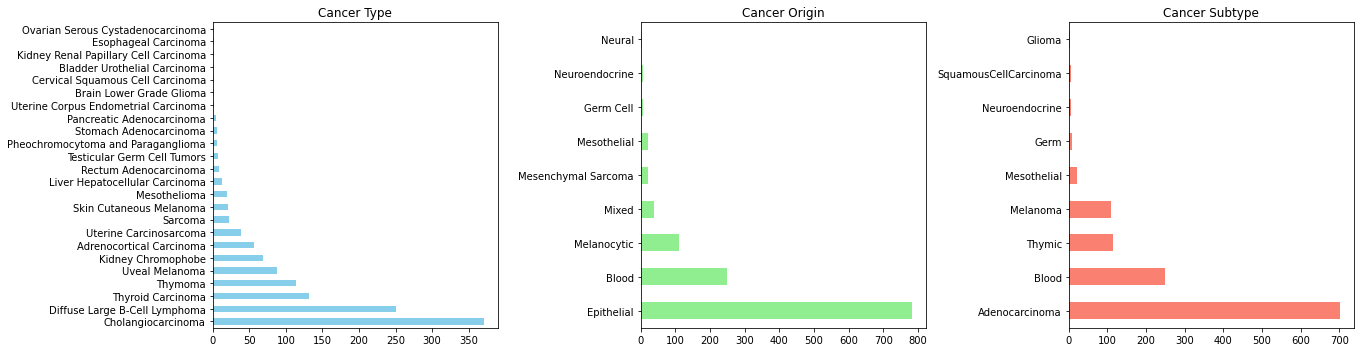

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(19, 5))

corrs.cancer_type.value_counts().plot.barh(ax=axes[0], color="skyblue")
axes[0].set_title("Cancer Type")
axes[0].set_ylabel("")
corrs.cancer_origin.value_counts().plot.barh(ax=axes[1], color="lightgreen")
axes[1].set_title("Cancer Origin")
axes[1].set_ylabel("")

corrs.cancer_subtype.value_counts().plot.barh(ax=axes[2], color="salmon")
axes[2].set_title("Cancer Subtype")
axes[2].set_ylabel("")

plt.tight_layout()
plt.show()

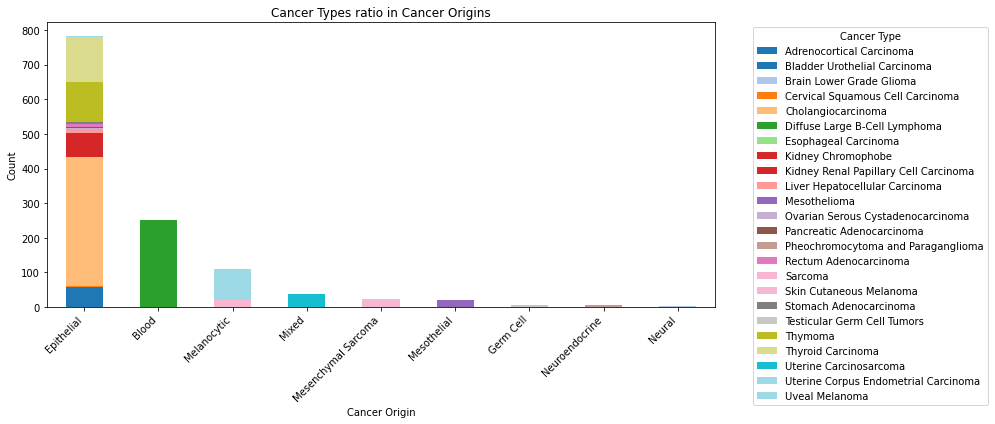

In [19]:
group_counts = (
    corrs.groupby(["cancer_origin", "cancer_type"]).size().unstack(fill_value=0)
)
group_counts = group_counts.loc[
    group_counts.sum(axis=1).sort_values(ascending=False).index
]

group_counts.plot(kind="bar", stacked=True, figsize=(14, 6), colormap="tab20")
plt.title("Cancer Types ratio in Cancer Origins")
plt.ylabel("Count")
plt.xlabel("Cancer Origin")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Cancer Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

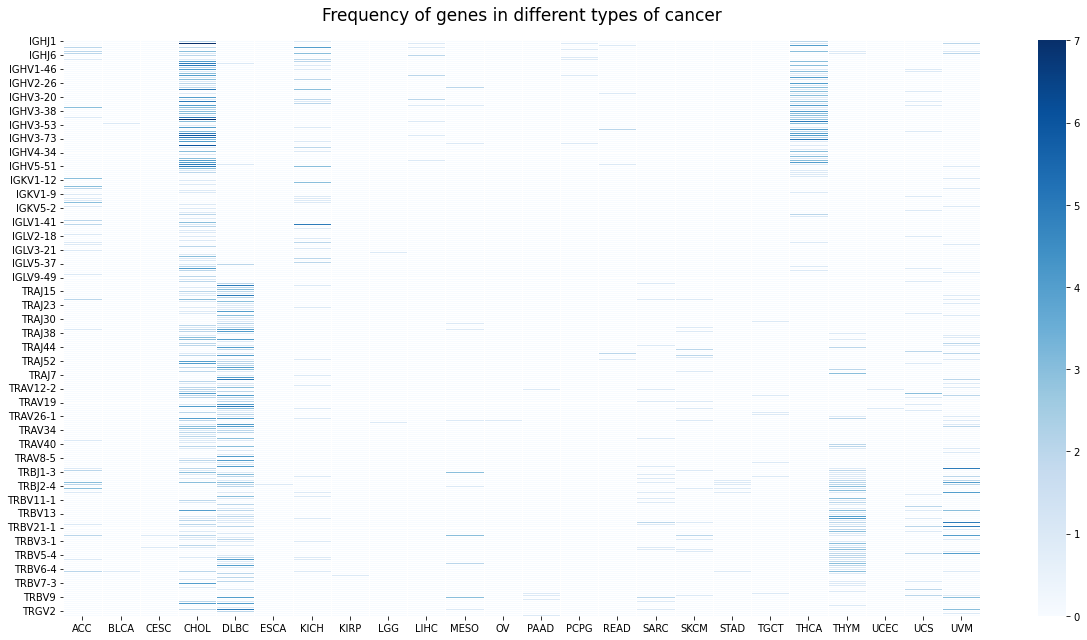

In [20]:
pivot = pd.crosstab(corrs["Gene"], corrs["TCGA_id"])

plt.figure(figsize=(17, 9))
sns.heatmap(pivot, cmap="Blues", annot=False, fmt="d", linewidths=0.5)
plt.title("Frequency of genes in different types of cancer", fontsize=17, pad=20)
plt.ylabel("")
plt.xlabel("")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Frequency of occurrence of TRA/B genes in different cancer types')

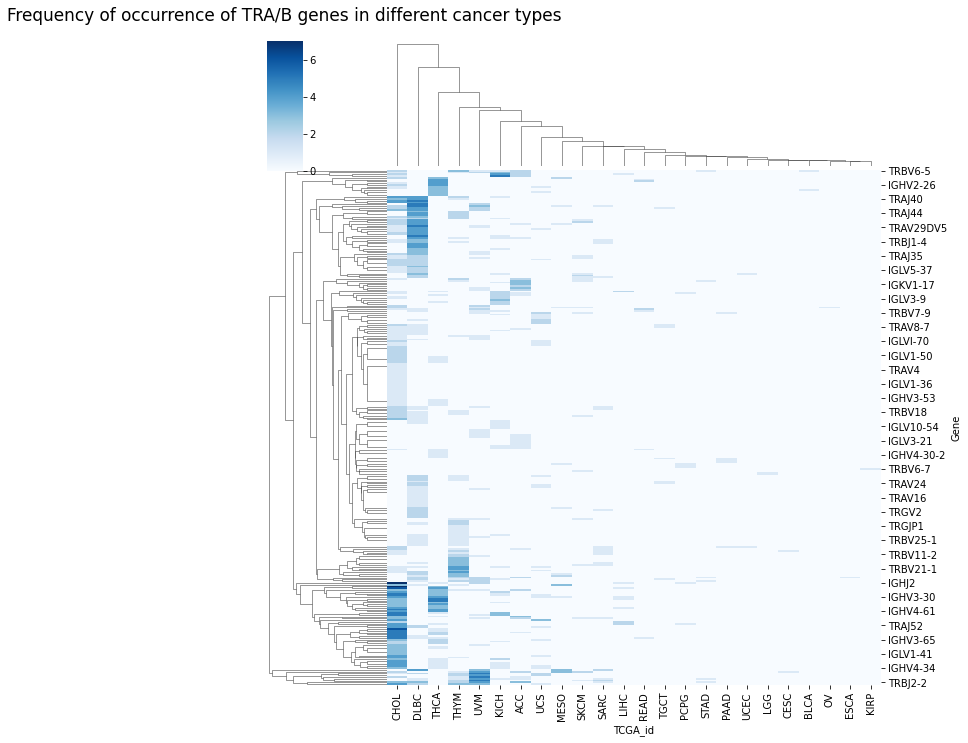

In [21]:
sns.clustermap(
    pivot,
    cmap="Blues",
)
plt.title(
    "Frequency of occurrence of TRA/B genes in different cancer types",
    fontsize=17,
    pad=20,
)

### Let's look at the most common genes and where they occur

In [22]:
top_genes = corrs["Gene"].value_counts().head(15)
top_genes

Gene
TRBJ2-2     17
TRBV27      15
TRBV12-4    13
TRBV9       12
TRGV10      12
IGHJ2       12
TRBV20-1    12
IGHV3-7     11
TRAV26-2    11
TRBV19      11
TRBV6-5     11
IGHV3-30    11
IGHJ4       10
IGHV3-22    10
TRBJ2-3     10
Name: count, dtype: int64

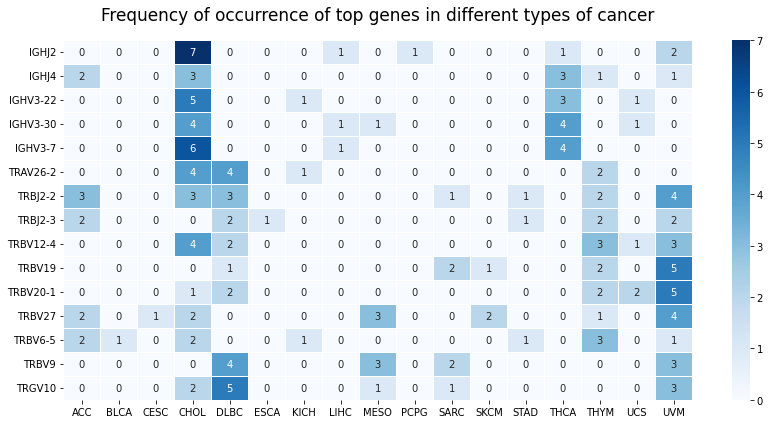

In [23]:
gene_cancer = corrs[corrs["Gene"].isin(top_genes.index)]
pivot = pd.crosstab(gene_cancer["Gene"], gene_cancer["TCGA_id"])

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap="Blues", annot=True, fmt="d", linewidths=0.5)
plt.title(
    "Frequency of occurrence of top genes in different types of cancer",
    fontsize=17,
    pad=20,
)
plt.ylabel("")
plt.xlabel("")
plt.tight_layout()
plt.show()

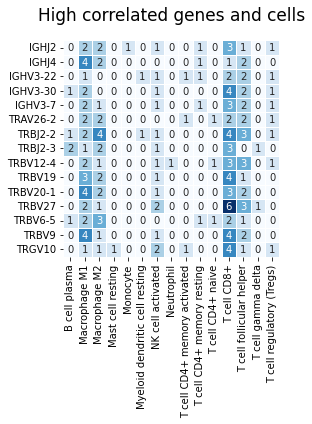

In [24]:
gene_cell = pd.crosstab(gene_cancer["Gene"], gene_cancer["Cell"])

plt.figure(figsize=(12, 6))
sns.heatmap(
    gene_cell,
    cmap="Blues",
    annot=True,
    fmt="d",
    linewidths=0.5,
    cbar=False,
    square=True,
)
plt.title("High correlated genes and cells", fontsize=17, pad=20)
plt.ylabel("")
plt.xlabel("")
plt.tight_layout()
plt.savefig("./pics/top-genes_cells_dec_hicorr.jpg", dpi=300)
plt.gca().set_aspect("equal", adjustable="box")

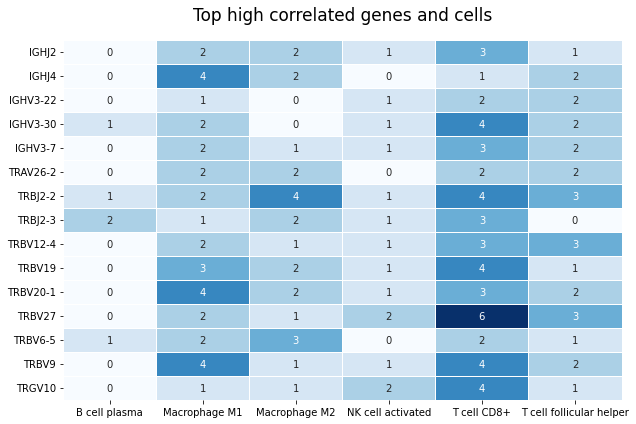

In [25]:
gene_cell_no1 = gene_cell.loc[:, (gene_cell > 1).any(axis=0)]
plt.figure(figsize=(9, 6))
sns.heatmap(gene_cell_no1, cmap="Blues", annot=True, linewidths=0.5, cbar=False)
plt.title("Top high correlated genes and cells", fontsize=17, pad=20)
plt.ylabel("")
plt.xlabel("")
plt.tight_layout()
plt.savefig("./pics/top-genes_cells_dec_hicorr_small.jpg", dpi=300)

### Let's look at the most frequent cells, in which cancers they occur

In [26]:
top_cells = corrs["Cell"].value_counts().head(15)
top_cells

Cell
T cell CD8+                       299
Macrophage M1                     207
T cell follicular helper          202
Macrophage M2                     175
T cell regulatory (Tregs)          65
NK cell activated                  58
T cell CD4+ memory resting         57
T cell CD4+ naive                  45
T cell CD4+ memory activated       34
Myeloid dendritic cell resting     20
Monocyte                           15
B cell memory                      13
B cell plasma                      12
Mast cell resting                  12
T cell gamma delta                 11
Name: count, dtype: int64

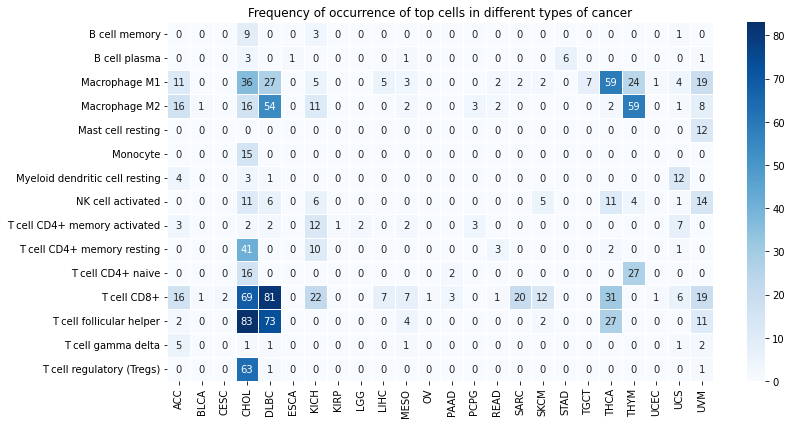

In [27]:
gene_cancer = corrs[corrs["Cell"].isin(top_cells.index)]
pivot = pd.crosstab(gene_cancer["Cell"], gene_cancer["TCGA_id"])

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap="Blues", annot=True, fmt="d", linewidths=0.5)
plt.title("Frequency of occurrence of top cells in different types of cancer")
plt.ylabel("")
plt.xlabel("")
plt.tight_layout()
plt.show()

## TPA/B correlations with non-T cells

Let's look at the most frequent genes and where they occur.

remove t cells

In [28]:
corrs_no_t = corrs[~corrs.Cell.str.contains("T cell")]
corrs_no_t

,TCGA_id,Gene,Cell,Correlation,project_id,cancer_type,cancer_origin,cancer_subtype
1,UCEC,TRAV21,Macrophage M1,0.519973,UCEC,Uterine Corpus Endometrial Carcinoma,Epithelial,Adenocarcinoma
4,BLCA,IGHV3-49,Macrophage M2,0.508890,BLCA,Bladder Urothelial Carcinoma,Epithelial,SquamousCellCarcinoma
5,TGCT,TRAV24,Macrophage M1,0.565349,TGCT,Testicular Germ Cell Tumors,Germ Cell,Germ
6,TGCT,TRAV23DV6,Macrophage M1,0.537484,TGCT,Testicular Germ Cell Tumors,Germ Cell,Germ
7,TGCT,TRBJ1-5,Macrophage M1,0.532581,TGCT,Testicular Germ Cell Tumors,Germ Cell,Germ
...,...,...,...,...,...,...,...,...
1229,UVM,TRAJ29,NK cell activated,0.502957,UVM,Uveal Melanoma,Melanocytic,Melanoma
1230,UVM,TRBV27,Macrophage M1,0.502901,UVM,Uveal Melanoma,Melanocytic,Melanoma
1234,UVM,TRAJ4,Macrophage M1,0.501159,UVM,Uveal Melanoma,Melanocytic,Melanoma
1235,UVM,TRAV12-1,Macrophage M1,0.500568,UVM,Uveal Melanoma,Melanocytic,Melanoma


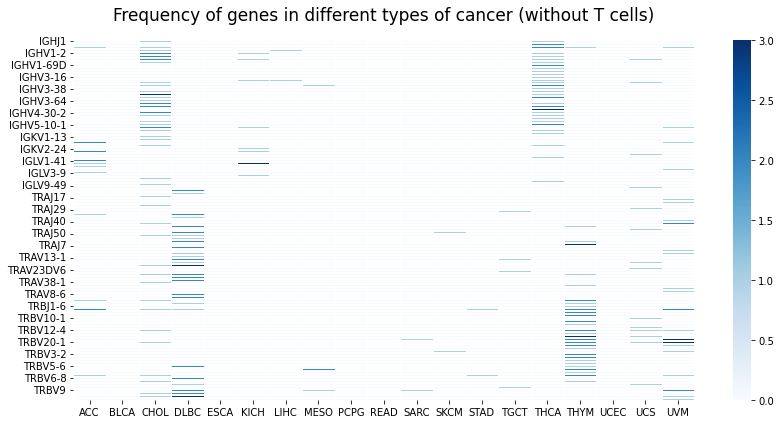

In [29]:
pivot = pd.crosstab(corrs_no_t["Gene"], corrs_no_t["TCGA_id"])

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap="Blues", annot=False, fmt="d", linewidths=0.5)
plt.title(
    "Frequency of genes in different types of cancer (without T cells)",
    fontsize=17,
    pad=20,
)
plt.ylabel("")
plt.xlabel("")
plt.tight_layout()
plt.show()